# CUSTOMER CHURNING PROJECT USING MACHIE LEARNING

In [1]:
import pandas as pd
import numpy as np

In [2]:
customer = pd.read_csv('https://raw.githubusercontent.com/nimkhedkarshreyas/customer-churn/refs/heads/main/customer_churn.csv')

In [3]:
customer.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [4]:
customer.tail()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0
899,Joseph Williams,39.0,9315.60,1,5.02,10.0,2010-09-25 12:16:08,"27252 Olivia Burgs Rivasmouth, MN 80121-6348",Davis Group,0


In [5]:
customer.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [6]:
customer.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [7]:
customer['Onboard_date'] = pd.to_datetime(customer['Onboard_date'])
customer['Onboard_timestamp'] = customer['Onboard_date'].astype('int64') // 10**9
# customer['combined_value'] = customer['Onboard_timestamp'] + customer['Numeric_Column']

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = customer.iloc[:,[1,2,3,4,5,6,9]]

In [10]:
df

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Churn
0,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,1
1,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,1
2,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,1
3,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,1
4,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,1
...,...,...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,0
896,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,0
897,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,0
898,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,0


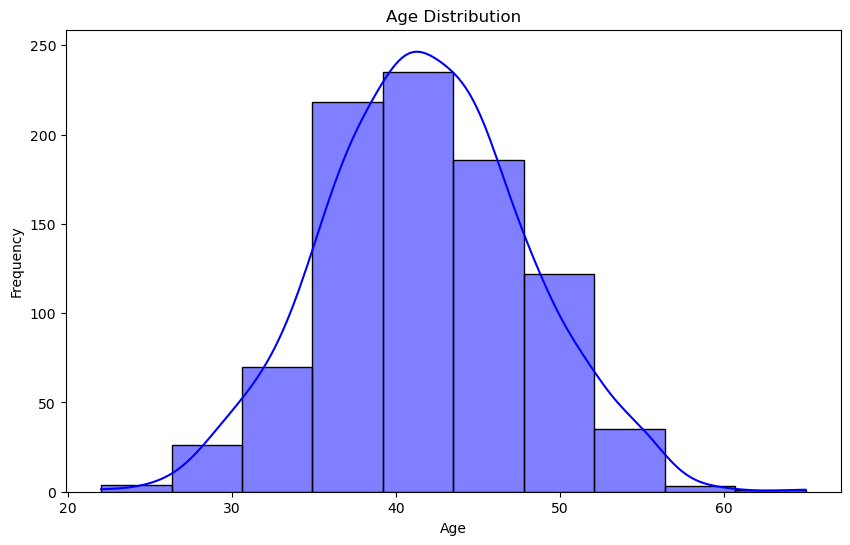

In [11]:
# Histogram for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=10, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

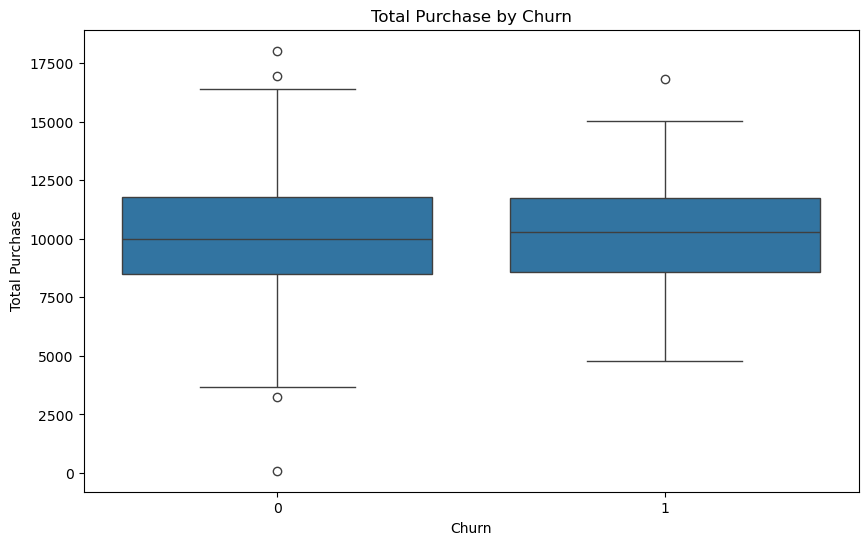

In [12]:
# Boxplot for Total Purchase by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Total_Purchase', data=df)
plt.title("Total Purchase by Churn")
plt.xlabel("Churn")
plt.ylabel("Total Purchase")
plt.show()

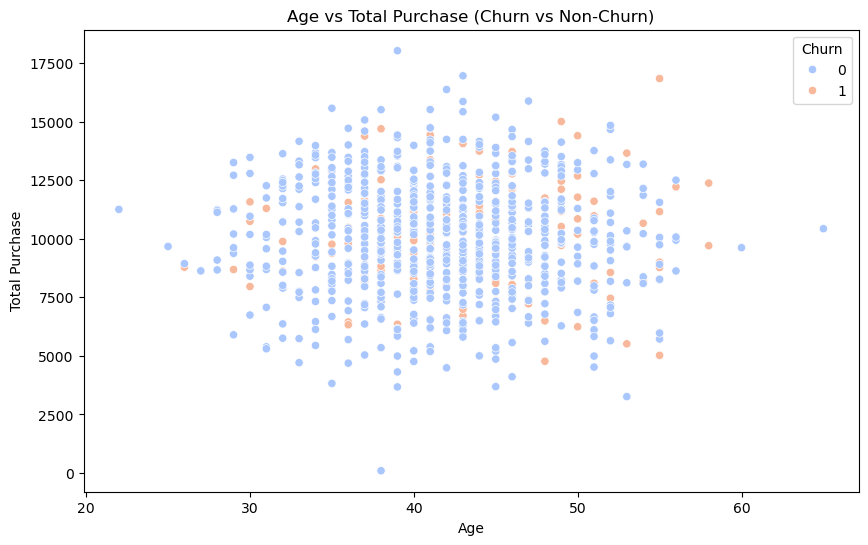

In [13]:
# Scatterplot: Age vs. Total Purchase colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total_Purchase', hue='Churn', data=df, palette='coolwarm')
plt.title("Age vs Total Purchase (Churn vs Non-Churn)")
plt.xlabel("Age")
plt.ylabel("Total Purchase")
plt.show()

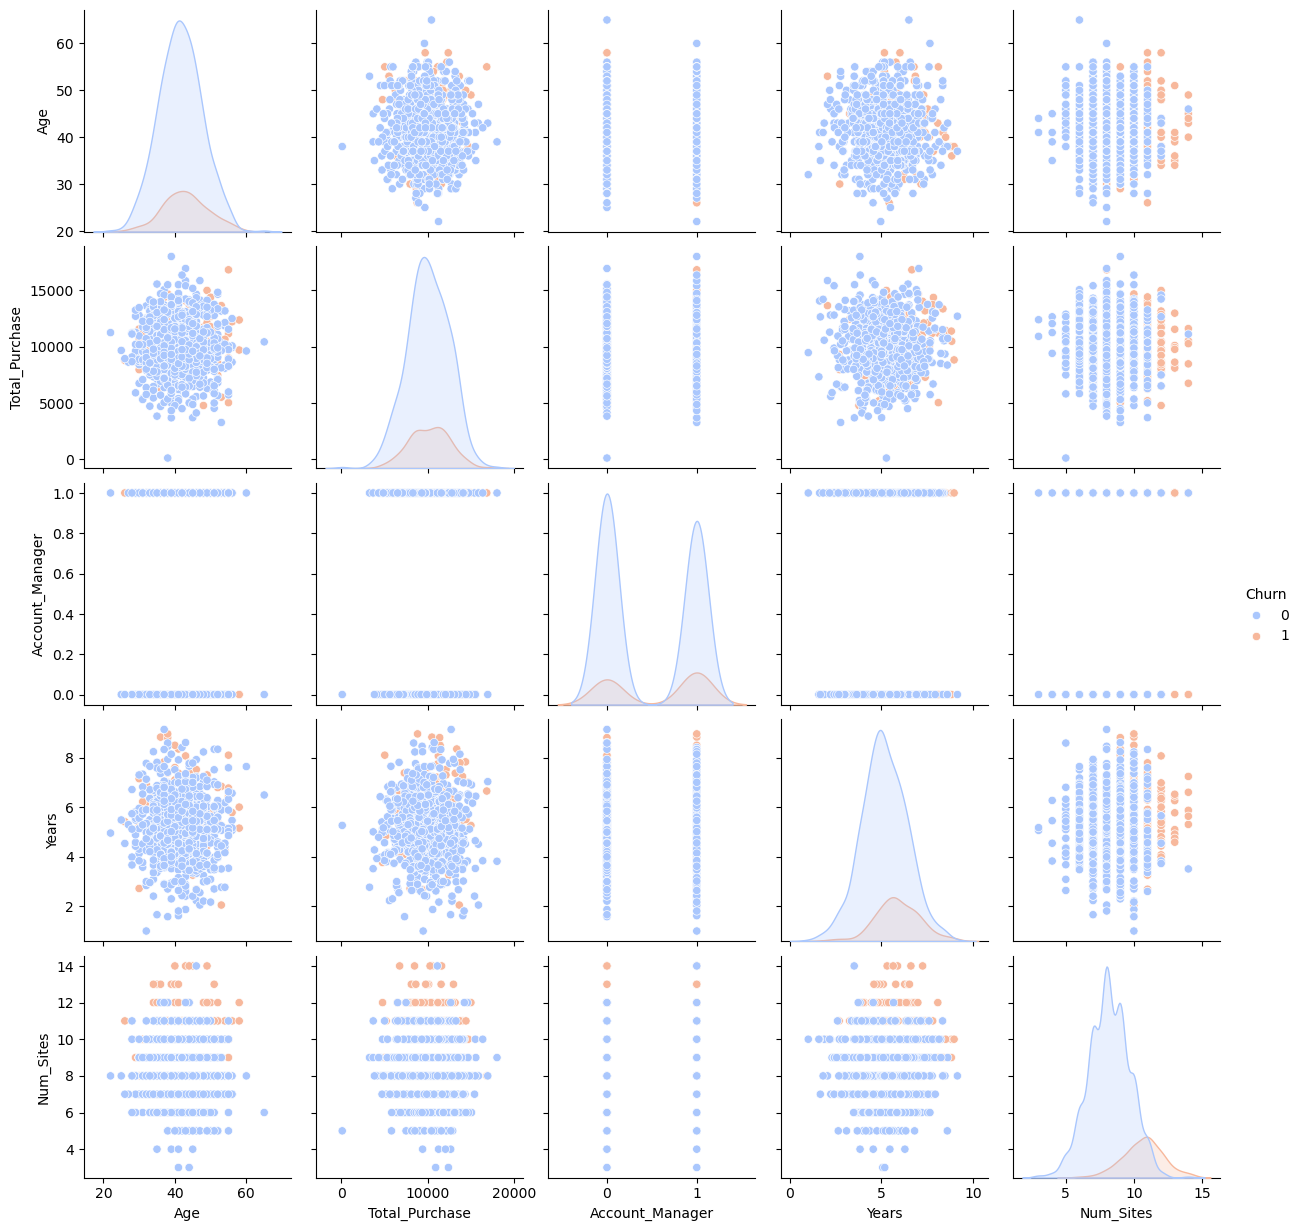

In [14]:
# Pairplot of all columns, colored by Churn
sns.pairplot(df, hue='Churn', palette='coolwarm')
plt.show()

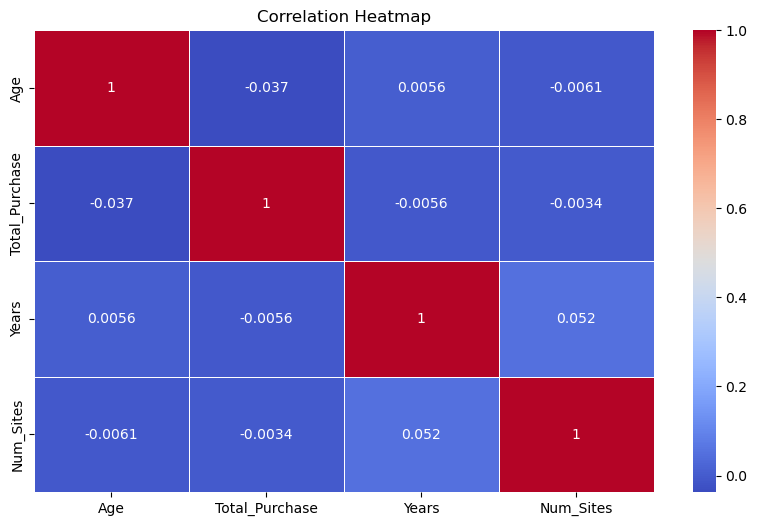

In [15]:
# Correlation Heatmap of numeric columns
plt.figure(figsize=(10, 6))
corr_matrix = df[['Age', 'Total_Purchase', 'Years', 'Num_Sites']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
customer

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,Onboard_timestamp
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,1377846040
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,1376354326
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,1467181207
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,1398170592
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,1453217475
...,...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0,1196515774
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0,1230477838
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0,1403241009
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0,1338336943


In [17]:
x = customer.iloc[:,[1,2,3,4,5]]
y = customer.iloc[:,[9]]

In [18]:
x

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
0,42.0,11066.80,0,7.22,8.0
1,41.0,11916.22,0,6.50,11.0
2,38.0,12884.75,0,6.67,12.0
3,42.0,8010.76,0,6.71,10.0
4,37.0,9191.58,0,5.56,9.0
...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0
896,52.0,9893.92,0,6.91,7.0
897,45.0,12056.18,0,5.46,4.0
898,51.0,6517.93,1,5.47,10.0


In [19]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
895,0
896,0
897,0
898,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [22]:
print(x.shape, x_train.shape, x_test.shape)

(900, 5) (810, 5) (90, 5)


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_train, y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
x_train_prediction = model.predict(x_train)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
x_train_scaled = scaler.fit_transform(x_train)

In [32]:
train_y_pred = model.predict(x_train)
print("train accuracy: ",accuracy_score(train_y_pred,y_train))

train accuracy:  0.8864197530864197


In [33]:
test_y_pred = model.predict(x_test)
print("train accuracy: ",accuracy_score(test_y_pred,y_test))

train accuracy:  0.9111111111111111


In [34]:
input_data = x_test
prediction = model.predict(input_data)
if prediction[0] == 1:
    print('cusomer will not convert') 
else:
    print('Customer will convert')

Customer will convert


In [35]:
import gradio as gr

In [36]:
def churn_prediction(Account_Manager, Total_Purchase, Years, Num_Sites, Onboard_timestamp):
    input_data = np.array([[Account_Manager, Total_Purchase, Years, Num_Sites, Onboard_timestamp]])
    input_data_scaled = scaler.transform(input_data)  # Scale the input data
    prediction = model.predict(input_data_scaled)
    return 'Customer will not convert' if prediction[0] == 0 else 'Customer will convert'

# Create Gradio interface
iface = gr.Interface(
    fn=churn_prediction,
    inputs=[
        gr.Number(label="Account Manager (0 or 1)"),
        gr.Number(label="Total Purchase"),
        gr.Number(label="Years with Company"),
        gr.Number(label="Number of Sites"),
        gr.Number(label="Onboard Timestamp")
    ],
    outputs="text",
    title="Customer Churn Prediction",
    description="Enter customer details to predict if they will convert or churn."
)

# Launch the app
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
